In [1]:
%matplotlib inline
import re
import requests
import math
from collections import Counter
import random
import matplotlib.pyplot as plt

In [2]:
TEXT = requests.get("https://norvig.com/big.txt").text
len(TEXT)

6488666

In [3]:
def tokens(text):
    return re.findall(r"[a-z]+", text.lower())

In [4]:
tokens("https://norvig.com/big.txt")

['https', 'norvig', 'com', 'big', 'txt']

In [5]:
WORDS = tokens(TEXT)
len(WORDS)

1105285

In [6]:
def sample(bag, n=10):
    return ' '.join(random.choice(bag) for _ in range(10))

In [7]:
COUNTS = Counter(WORDS)

print(COUNTS.most_common(10))

[('the', 80030), ('of', 40025), ('and', 38313), ('to', 28766), ('in', 22050), ('a', 21155), ('that', 12512), ('he', 12401), ('was', 11410), ('it', 10681)]


In [8]:
for w in tokens("the rare and neverbeforeseen words"):
    print(w, COUNTS[w])

the 80030
rare 83
and 38313
neverbeforeseen 0
words 460


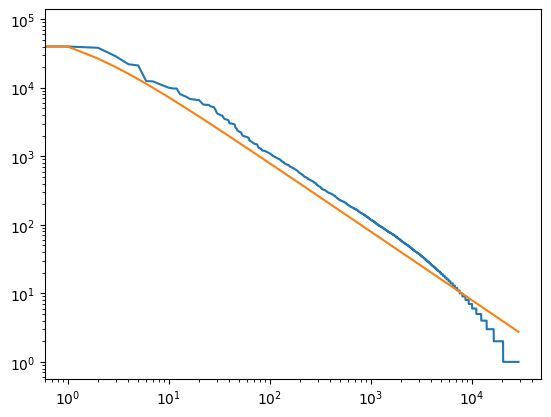

In [9]:
M = COUNTS['the']

plt.yscale('log')
plt.xscale('log')
plt.plot([c for (w, c) in COUNTS.most_common()])
plt.plot([M/i for i in range(1,len(COUNTS))])

In [10]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

def known(words):
    return {w for w in words if w in COUNTS}

def edits0(word):
    return {word}

def splits(word):
    return [(word[:i], word[i:]) for i in range(len(word)+1)][1:-1]

def edits1(word):
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}

def correct(word):
    candidates = (known(edits0(word)) or known(edits1(word)) or known(edits2(word)))
    return max(candidates, key=COUNTS.get)


In [11]:
list(map(correct, tokens("Speling errurs in somethink. Whutever; unusuel misteakes everyware?")))

['spelling',
 'errors',
 'in',
 'something',
 'whatever',
 'unusual',
 'mistakes',
 'everywhere']

In [19]:
def case_of(text):
    return (
        str.title if text.istitle() else
        str.upper if text.isupper() else
        str.lower if text.lower() else
        str
    )

def correct_match(match):
    word = match.group()
    return case_of(word)(correct(word.lower()))

def correct_text(text):
    return re.sub('[a-zA-Z]+', correct_match, text)

In [20]:
correct_text("Speling Errurs IN somethink. Whutever; unusuel misteakes?")

'Spelling Errors IN something. Whatever; unusual mistakes?'

In [21]:
d = {"1": 1, "2": 2, "3": 3}
N = sum(list(d.values()))
print(lambda x: d[x]/N)

<function <lambda> at 0x000002C368CBD9E0>


In [23]:
def pdist(counter):
    N = sum(list(counter.values()))
    return lambda x: counter[x]/N

P = pdist(COUNTS)

In [24]:
for w in tokens('"The" is the most common word in English'):
    print(P(w), w)

0.07240666434449033 the
0.008842968103249388 is
0.07240666434449033 the
0.0008215075749693518 most
0.0002596615352601365 common
0.0002696137195383996 word
0.019949605757790978 in
0.00019090098933759167 english
